In [1]:
# import packages
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import statsmodels.stats as sms
import statsmodels.stats.api as smss
from scipy import stats
import numpy as np

C:\Users\zblack\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
# create a common alpha
alpha =  0.003/10

# zTest Function
def zTest(df,df1,df2,column, alpha):
    z, p = sms.weightstats.ztest(df1[column],df2[column],alternative ='two-sided', usevar='pooled')
    print('Z statistic: ', round(z,3))
    print('Probablility they have same vpg: ', round(p,5))
    print('Standard Error of All VPG: ', round(stats.sem(df[column]),3))
    print('Range of Difference in VPG: ',smss.CompareMeans(smss.DescrStatsW(df1[column]),smss.DescrStatsW(df2[column])).tconfint_diff(usevar='pooled', alpha =alpha))

# list diffence function   
def listDiff(first, second):
    second = set(second)
    return [item for item in first if item not in second]

In [3]:
# import data
df = pd.read_csv('BGVSpringboardData.csv')

In [4]:
#Set TourID to index
df= df.set_index('TourID_dimension')

print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14445 entries, 146456 to 381090
Data columns (total 11 columns):
Age                           14445 non-null int64
AgentLine                     14445 non-null object
BookingWindow                 14445 non-null object
FirstGenVsOwner               14445 non-null object
HHIncomeRanges                14445 non-null object
Homeowner                     14445 non-null object
InState                       14445 non-null object
Programs (Budget)             14445 non-null object
relationStatus                14445 non-null object
ResultOfTour                  14445 non-null object
NetVolumePlusNonGoodVolume    14445 non-null float64
dtypes: float64(1), int64(1), object(9)
memory usage: 1.3+ MB
None


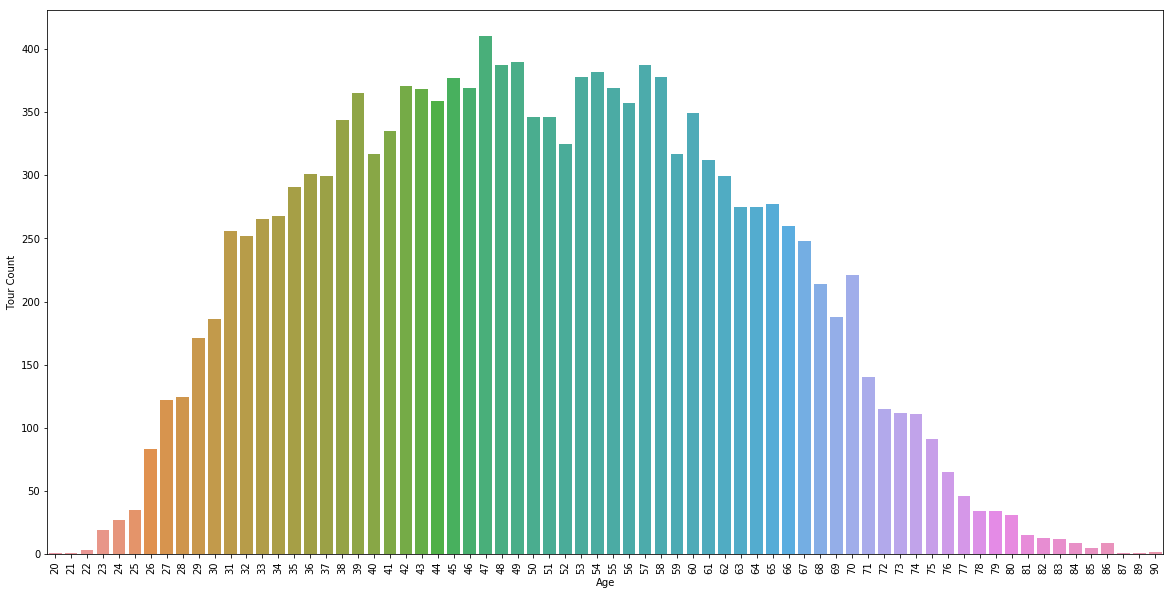

In [5]:
#increase  figure size
mpl.rcParams['figure.figsize'] = (20,10)

sns.countplot(x= 'Age', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.show()

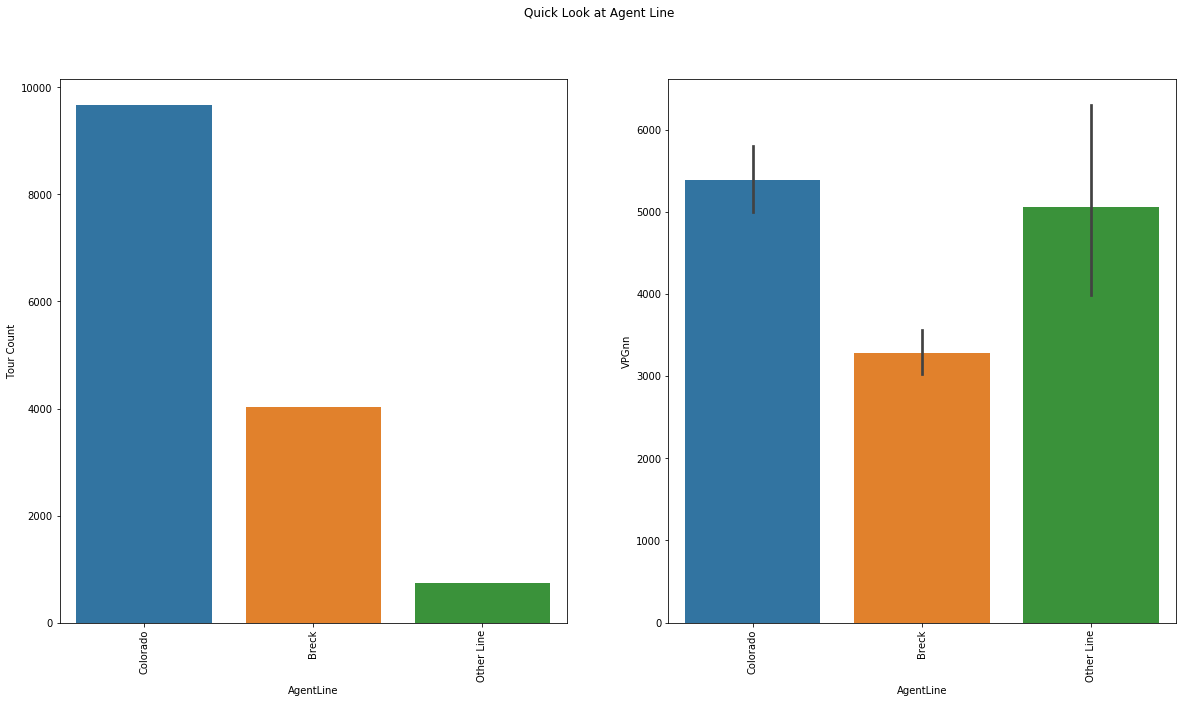

Colorado vs Breck Lines Differences in VPG
Z statistic:  6.714
Probablility they have same vpg:  0.0
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (973.4694281192394, 3246.341732085426)


In [6]:
plt.subplot(1,2,1)
sns.countplot(x= 'AgentLine', data = df)
plt.ylabel('Tour Count')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x= 'AgentLine', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Agent Line')
plt.show()

#Colorado Line Versus Breck Line z test
dfColorado = df[df.AgentLine == 'Colorado']
dfBreck = df[df.AgentLine == 'Breck']

print('Colorado vs Breck Lines Differences in VPG')
zTest(df,dfColorado,dfBreck, 'NetVolumePlusNonGoodVolume', alpha)

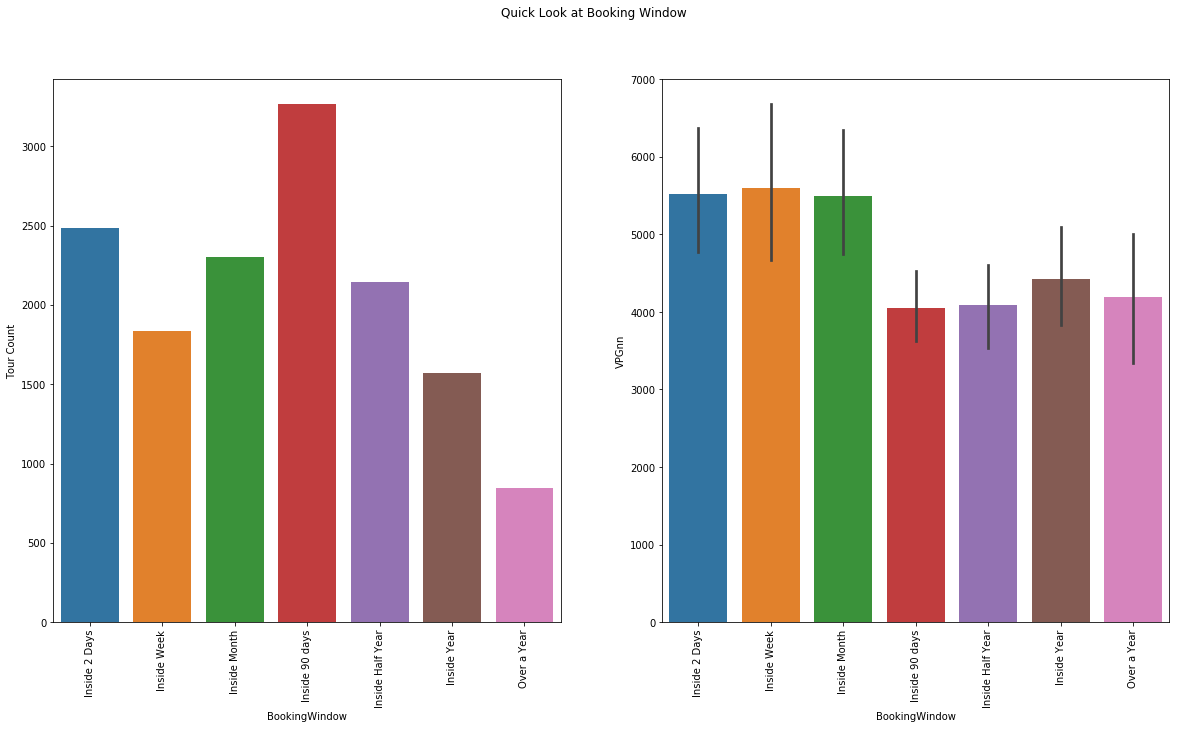

In [7]:
plt.subplot(1,2,1)
sns.countplot(x= 'BookingWindow', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(x= 'BookingWindow',y = 'NetVolumePlusNonGoodVolume', data = df,order =['Inside 2 Days', 'Inside Week', 'Inside Month', 'Inside 90 days','Inside Half Year', 'Inside Year', 'Over a Year'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Booking Window')
plt.show()

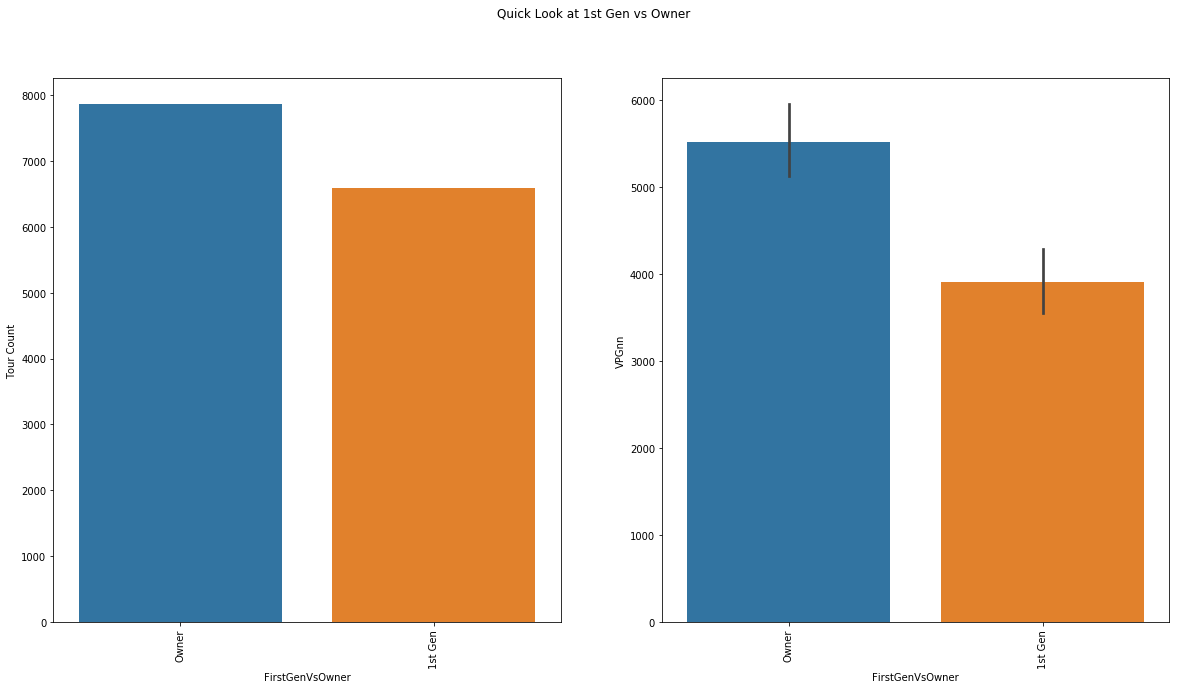

Owner Versus First Gen True Difference in VPG
Z statistic:  5.781
Probablility they have same vpg:  0.0
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (603.4722256830802, 2619.312259218693)


In [8]:
plt.subplot(1,2,1)
sns.countplot(x= 'FirstGenVsOwner', data = df)
plt.ylabel('Tour Count')
plt.xticks(rotation=90)
plt.subplot(1,2,2)
sns.barplot(x= 'FirstGenVsOwner',y = 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at 1st Gen vs Owner')
plt.show()

#bgv owner vs first gen z test
dfOwner = df[df.FirstGenVsOwner == 'Owner']
dfFirstGen = df[df.FirstGenVsOwner == '1st Gen']

print('Owner Versus First Gen True Difference in VPG')
zTest(df,dfOwner,dfFirstGen, 'NetVolumePlusNonGoodVolume', alpha)

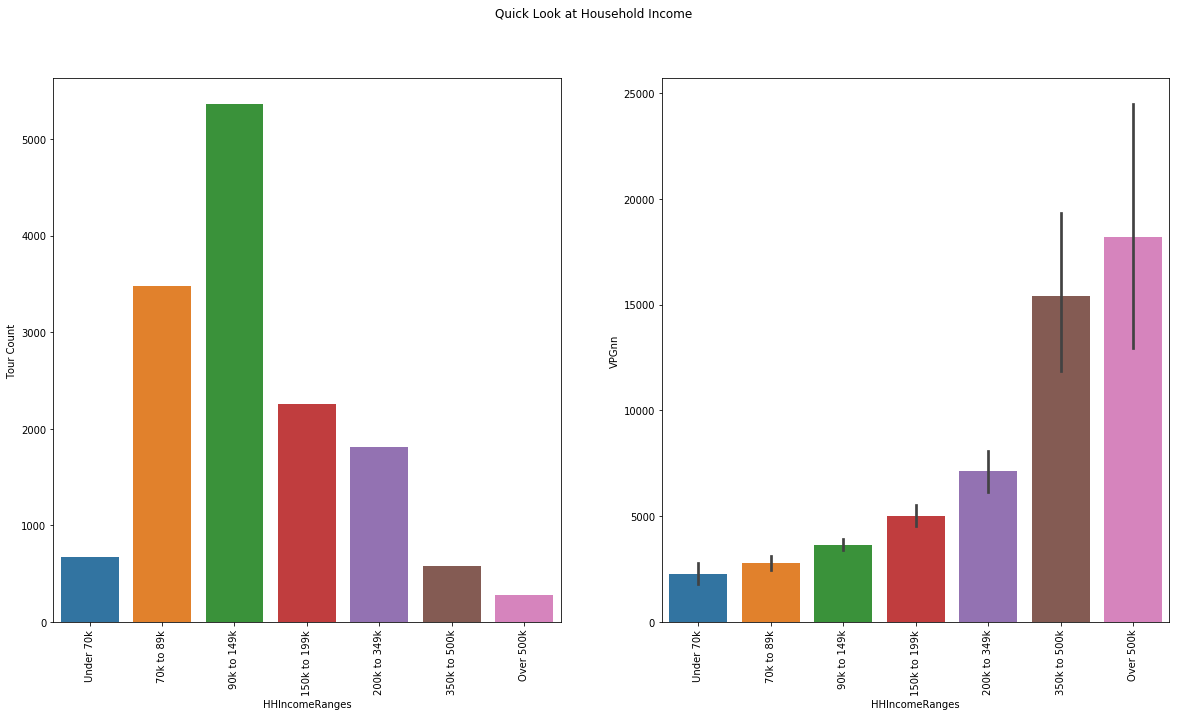

In [9]:
plt.subplot(1,2,1)
sns.countplot(x= 'HHIncomeRanges', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(x='HHIncomeRanges',y ='NetVolumePlusNonGoodVolume', data = df, order =['Under 70k','70k to 89k','90k to 149k','150k to 199k', '200k to 349k','350k to 500k','Over 500k'])
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Household Income')
plt.show()

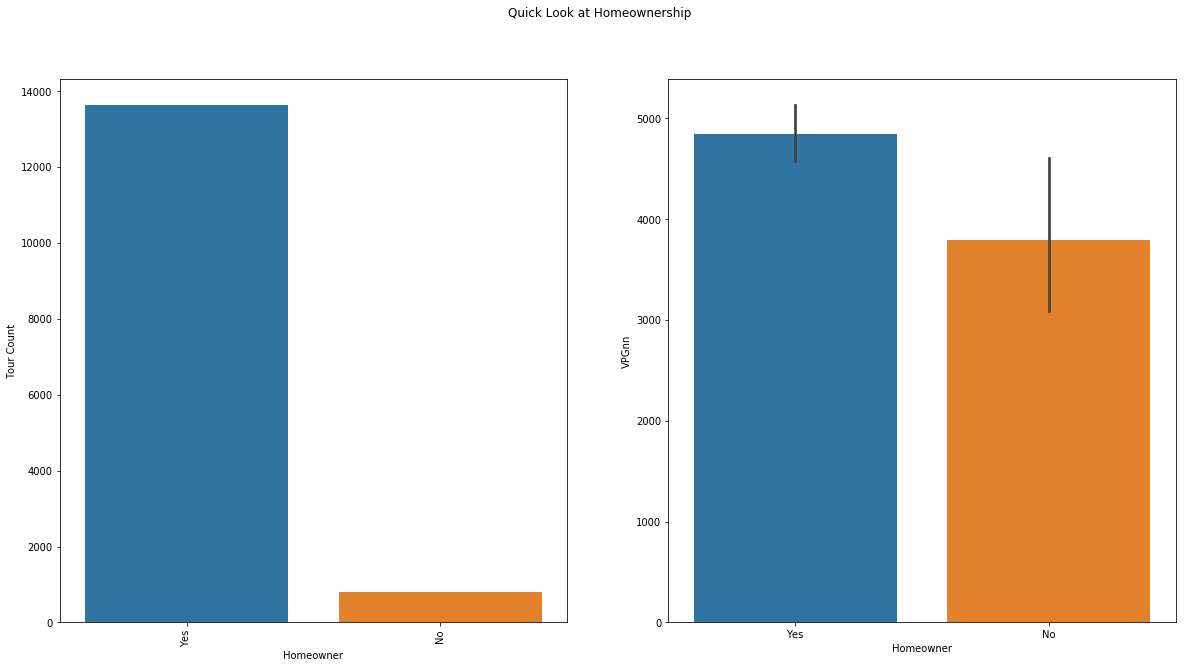

Homeowner Versus Non Homeowner True Difference in VPG
Z statistic:  1.725
Probablility they have same vpg:  0.0845
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (-1148.2008139871627, 3243.2152906637443)


In [10]:
plt.subplot(1,2,1)
sns.countplot(x= 'Homeowner', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(y= 'NetVolumePlusNonGoodVolume', x='Homeowner', data= df)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Homeownership')
plt.show()

#homeowner z test
dfHY = df[df.Homeowner == 'Yes']
dfHN = df[df.Homeowner == 'No']

print('Homeowner Versus Non Homeowner True Difference in VPG')
zTest(df,dfHY,dfHN, 'NetVolumePlusNonGoodVolume', alpha)

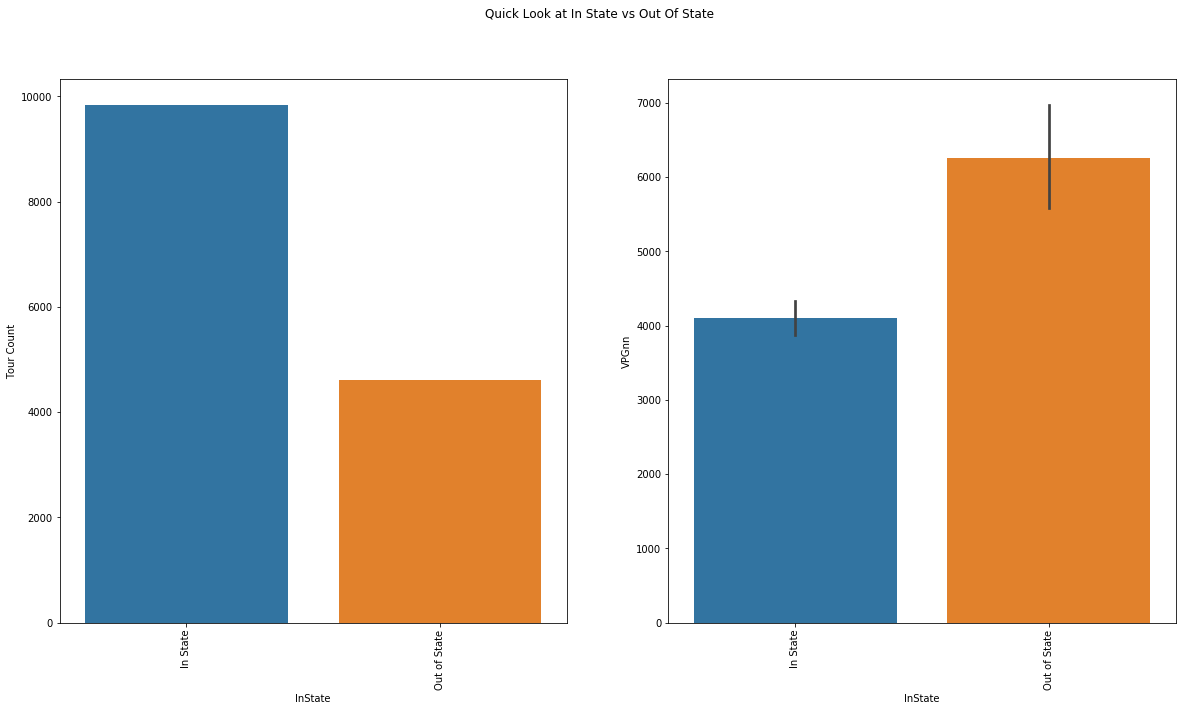

In State Versus Out of State True Difference in VPG
Z statistic:  -7.25
Probablility they have same vpg:  0.0
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (-3234.360713992482, -1081.5280749065355)


In [11]:
# instate quick look
plt.subplot(1,2,1)
sns.countplot(x= 'InState', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(x= 'InState', y='NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at In State vs Out Of State')
plt.show()


#in state vs out of state status z test
dfIn = df[df.InState == 'In State']
dfOut = df[df.InState == 'Out of State']

print('In State Versus Out of State True Difference in VPG')
zTest(df,dfIn,dfOut, 'NetVolumePlusNonGoodVolume', alpha)

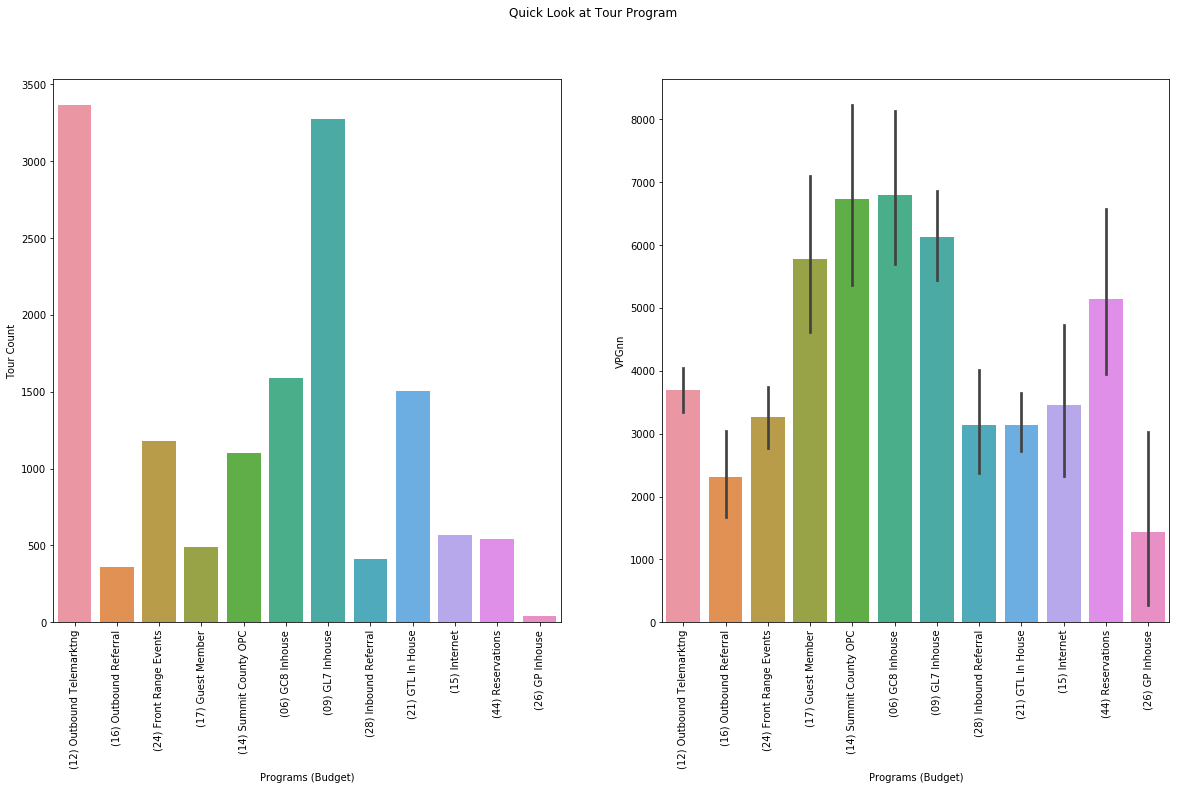

In [12]:
plt.subplot(1,2,1)
sns.countplot(x= 'Programs (Budget)', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(x= 'Programs (Budget)', y = 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Tour Program')
plt.show()

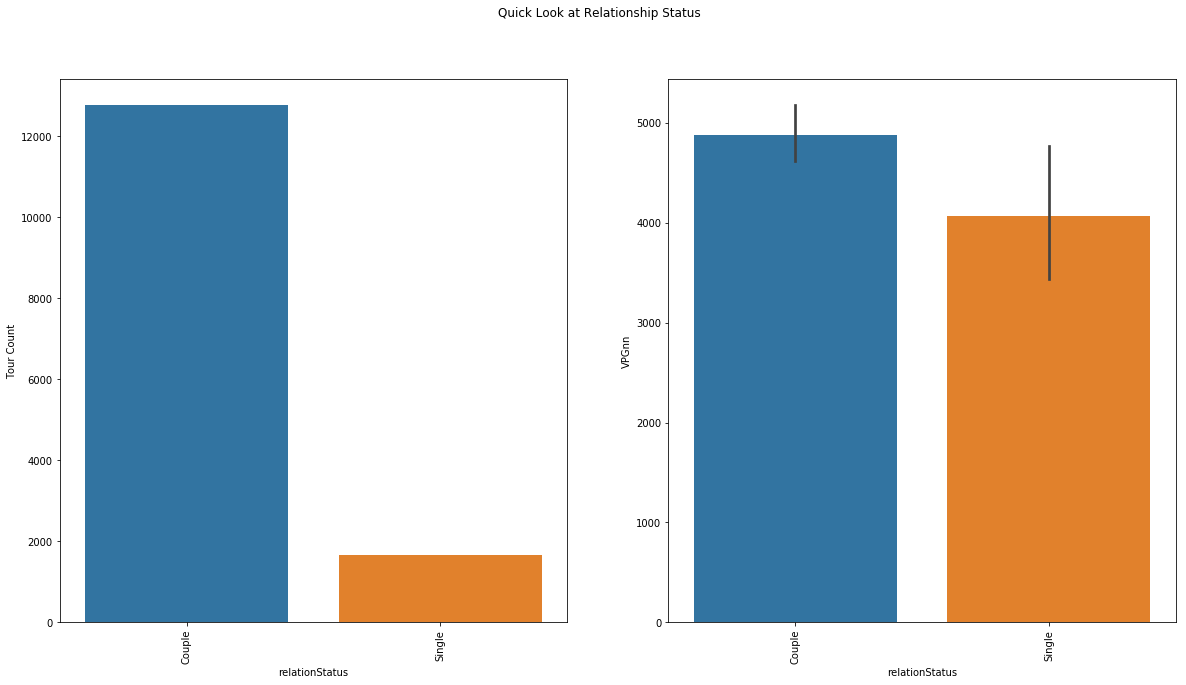

Couples Versus Singles Difference in VPG
Z statistic:  1.852
Probablility they have same vpg:  0.06404
Standard Error of All VPG:  138.971
Range of Difference in VPG:  (-769.3390107663724, 2384.3751158269606)


In [13]:
# relationship status quick look
plt.subplot(1,2,1)
sns.countplot(x= 'relationStatus', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(x= 'relationStatus', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Relationship Status')
plt.show()


#relationship status z test
dfCouple = df[df.relationStatus == 'Couple']
dfSingle = df[df.relationStatus == 'Single']

print('Couples Versus Singles Difference in VPG')
zTest(df,dfCouple,dfSingle, 'NetVolumePlusNonGoodVolume', alpha)

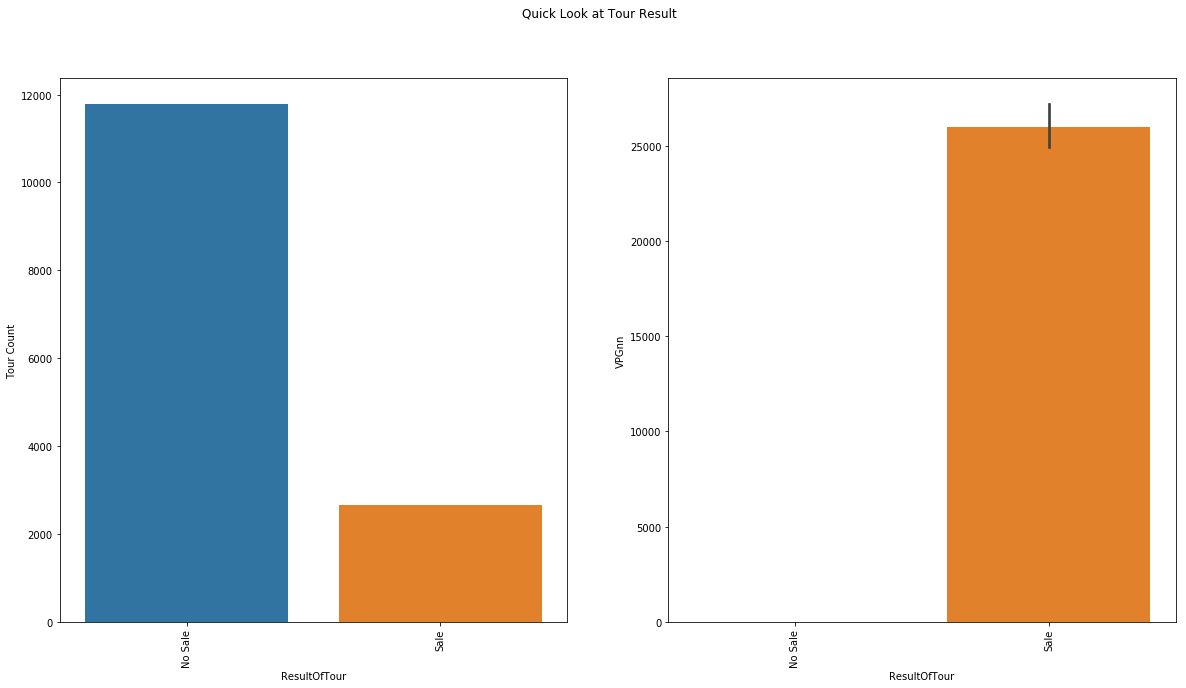

In [14]:
plt.subplot(1,2,1)
sns.countplot(x= 'ResultOfTour', data = df)
plt.xticks(rotation=90)
plt.ylabel('Tour Count')
plt.subplot(1,2,2)
sns.barplot(x= 'ResultOfTour', y= 'NetVolumePlusNonGoodVolume', data = df)
plt.xticks(rotation=90)
plt.ylabel('VPGnn')
plt.suptitle('Quick Look at Tour Result')
plt.show()

In [15]:
print(df.columns.tolist())

['Age', 'AgentLine', 'BookingWindow', 'FirstGenVsOwner', 'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)', 'relationStatus', 'ResultOfTour', 'NetVolumePlusNonGoodVolume']


In [16]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import StratifiedKFold
from sklearn import metrics

dfX = df.drop(['ResultOfTour', 'NetVolumePlusNonGoodVolume'], axis = 1)

# AgentLine Conversion to Numeric
lineDICT = {'Colorado':0, 'Breck':1, 'Other Line':2}
dfX['AgentLine'] = dfX['AgentLine'].replace(lineDICT)

# BookingWindow Conversion to Numeric
bookDICT = {'Inside 2 Days':0, 'Inside Week':1, 'Inside Month':2, 'Inside 90 days': 3,'Inside Half Year': 4,'Inside Year': 5,'Over a Year': 6}
dfX['BookingWindow'] = dfX['BookingWindow'].replace(bookDICT)

# FirstGenVsOwner Conversion to Numeric
ownDICT = {'Owner':0, '1st Gen':1}
dfX['FirstGenVsOwner'] = dfX['FirstGenVsOwner'].replace(ownDICT)

# HHIncomeRanges Conversion to Numeric
hhiDICT = {'Under 70k':0,'70k to 89k':1,'90k to 149k':2,'150k to 199k':3, '200k to 349k':4,'350k to 500k':5,'Over 500k':6}
dfX['HHIncomeRanges'] = dfX['HHIncomeRanges'].replace(hhiDICT)

# Homeowner Conversion to Numeric
homeDICT = {'No':0, 'Yes':1}
dfX['Homeowner'] = dfX['Homeowner'].replace(homeDICT)

# InState Conversion to Numeric
stateDICT = {'In State':0, 'Out of State':1}
dfX['InState'] = dfX['InState'].replace(stateDICT)

# Program (Budget) Conversion to Numeric
progDICT = {'(06) GC8 Inhouse':0,'(09) GL7 Inhouse':1,'(21) GTL In House':2,'(26) GP Inhouse':3, '(17) Guest Member':4,'(12) Outbound Telemarktng':5,'(14) Summit County OPC':6, '(16) Outbound Referral':7,'(28) Inbound Referral':8,'(24) Front Range Events':9, '(15) Internet':10, '(44) Reservations':11}
dfX['Programs (Budget)'] = dfX['Programs (Budget)'].replace(progDICT)

# relationStatus Conversion to Numeric
relationDICT = {'Couple':0, 'Single':1}
dfX['relationStatus'] = dfX['relationStatus'].replace(relationDICT)


dic = {'No Sale':0, 'Sale':1}
dfY = df['ResultOfTour'].replace(dic)
dfY2 = df['NetVolumePlusNonGoodVolume']

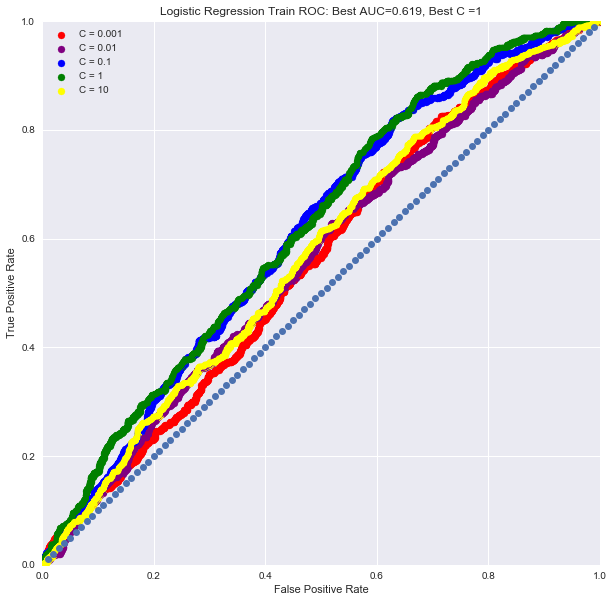

In [17]:
bestC = 0
bestAUCC = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of c values and kfold
Cs = [0.001, 0.01, 0.1, 1,10]
kf = StratifiedKFold(n_splits=5)

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX,dfY):
    lr = LogisticRegression(C=Cs[i])
    lr.fit(dfX.iloc[train.tolist()],dfY.iloc[train.tolist()])
    preds = lr.predict_proba(dfX.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCC:
        bestC=Cs[i]
        bestAUCC=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='C = '+str(Cs[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Logistic Regression Train ROC: Best AUC='+str(round(bestAUCC,3))+', Best C ='+str(bestC))
x = np.arange(1, 100)/100
y=x
plt.plot(x,y,'o')
plt.show()

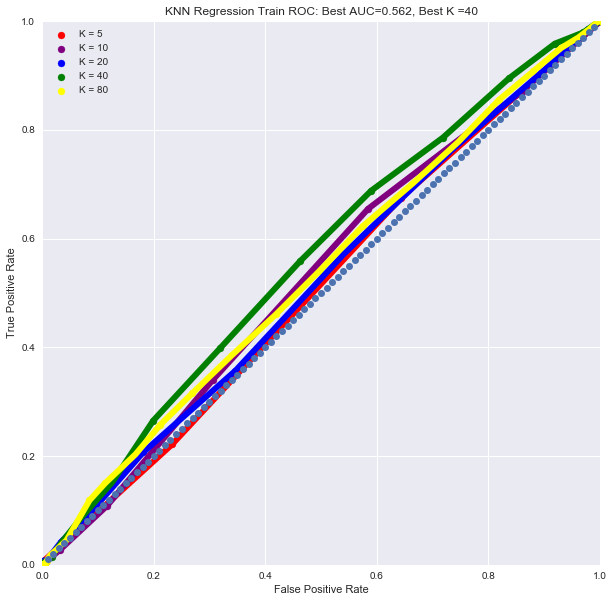

In [27]:
from sklearn.neighbors import KNeighborsClassifier

bestK = 0
bestAUCK = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of K values and kfold
Ks = [5,10,20,40,80]
kf = StratifiedKFold(n_splits=5)

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX,dfY):
    knn = KNeighborsClassifier(Ks[i])
    knn.fit(dfX.iloc[train.tolist()],dfY.iloc[train.tolist()])
    preds = knn.predict_proba(dfX.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCK:
        bestK=Ks[i]
        bestAUCK=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='K = '+str(Ks[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('KNN Regression Train ROC: Best AUC='+str(round(bestAUCK,3))+', Best K ='+str(bestK))
plt.plot(x,y,'o')
plt.show()


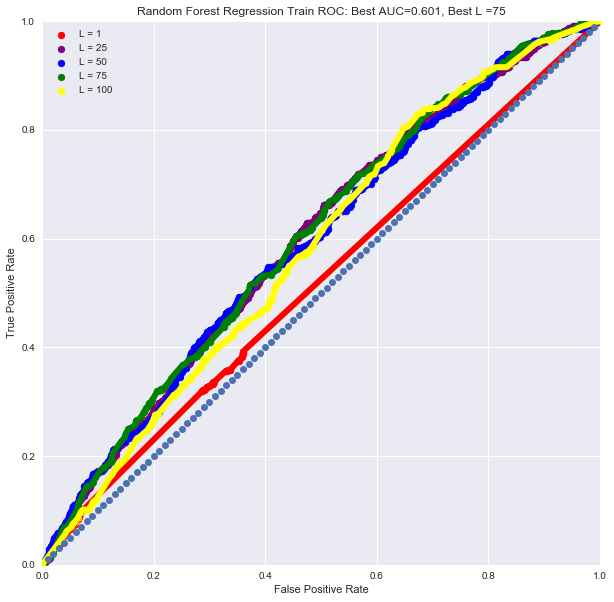

In [25]:
from sklearn.ensemble import RandomForestClassifier

bestL = 0
bestAUCL = 0
i = 0
colors= ['red','purple','blue','green','yellow']

#make cross validation of K values and kfold
Ls = [1,25,50,75,100]
kf = StratifiedKFold(n_splits=5)

#change  figure size
mpl.rcParams['figure.figsize'] = (10,10)


#ROC plot of model accuracy
sns.set()
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

for train, test in kf.split(dfX,dfY):
    rfr = RandomForestClassifier(n_estimators=2,min_samples_leaf=Ls[i])
    rfr.fit(dfX.iloc[train.tolist()],dfY.iloc[train.tolist()])
    preds = rfr.predict_proba(dfX.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY.iloc[test.tolist()], preds)
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCL:
        bestL=Ls[i]
        bestAUCL=auc
    i += 1 
    plt.scatter(x=fpr, y=tpr, c = colors[i-1],label='L = '+str(Ls[i-1]))
    plt.plot(fpr,tpr, color = colors[i-1], linewidth=6.0)
plt.legend()    
plt.title('Random Forest Regression Train ROC: Best AUC='+str(round(bestAUCL,3))+', Best L ='+str(bestL))
plt.plot(x,y,'o')
plt.show()

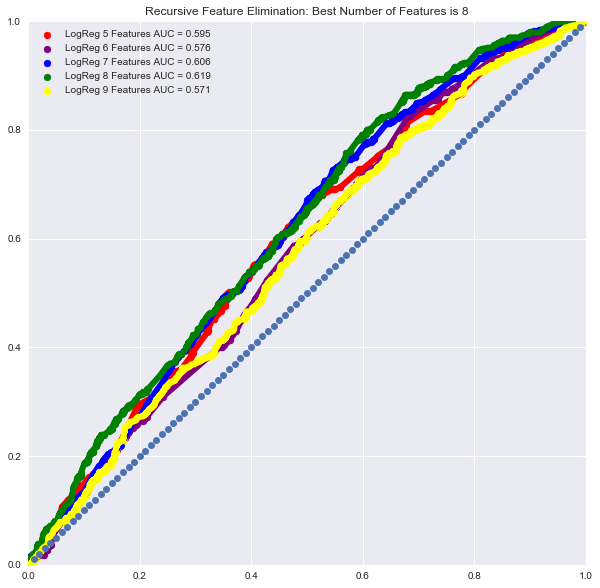

Selected Features:  ['AgentLine', 'BookingWindow', 'FirstGenVsOwner', 'HHIncomeRanges', 'Homeowner', 'InState', 'Programs (Budget)', 'relationStatus']

Not Selected Features: ['Age']


In [20]:
from sklearn.feature_selection import RFE
i=0
bestF =0
bestAUCF =0
bestMask =[]

Fs = [5,6,7,8,9]


for train, test in kf.split(dfX,dfY):
    model = LogisticRegression(C=bestC)
    # create the RFE model and select 3 attributes
    rfe = RFE(model,Fs[i], step =1)
    rfe = rfe.fit(dfX.iloc[train.tolist()], dfY.iloc[train.tolist()])
    preds = rfe.predict_proba(dfX.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY.iloc[test.tolist()], preds)    
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCF:
        bestF=Fs[i]
        bestAUCF=auc
        bestMask = list(dfX.columns[rfe.support_])
        plt.title('Recursive Feature Elimination: Best Number of Features is ' + str(len(bestMask)))
    i+=1
    #plot ROC Curves of Logistic regression models using best Cs to from kFold Cross Validation
    plt.scatter(x=fpr, y=tpr, color = colors[i-1] , label= 'LogReg ' +str(rfe.n_features_)+' Features AUC = '+str(round(auc,3)))
    plt.plot(fpr,tpr,color= colors[i-1],linewidth=6.0)

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.plot(x,y,'o')
plt.show()

print('Selected Features: ',bestMask)
print()
print('Not Selected Features:',listDiff(dfX.columns.tolist(),bestMask))

In [21]:
#tabpy function to call


model = LogisticRegression(C=bestC)
model.fit(dfX,dfY)

def isBuyer(Age, AgentLine, BookingWindow, FirstGenVsOwner, HHIRanges, 
                     Homeowner, InState, Programs, relationStatus):
    
    X = pd.DataFrame(np.column_stack([Age, AgentLine, BookingWindow, FirstGenVsOwner, HHIRanges, 
                     Homeowner, InState, Programs, relationStatus])).replace(lineDICT).replace(bookDICT).replace(ownDICT).replace(hhiDICT).replace(homeDICT).replace(stateDICT).replace(progDICT).replace(relationDICT)

    return model.predict(X)
   


In [22]:
isBuyer(65,'Breck','Inside Week', 'Owner', 'Over 500k', 'Yes', 'Out of State', '(06) GC8 Inhouse', 'Couple')

array([0], dtype=int64)

In [23]:
from sklearn import linear_model
i=0
bestLasso =0
bestAUCLasso =0




for train, test in kf.split(dfX,dfY2):
    model = linear_model.LinearRegression()
    model.fit(dfX.iloc[train.tolist()], dfY2.iloc[train.tolist()])
    preds = rfe.predict_proba(dfX.iloc[test.tolist()])[:,1]
    fpr, tpr, threshold = metrics.roc_curve(dfY2.iloc[test.tolist()], preds)    
    auc = metrics.auc(fpr,tpr)
    if auc>bestAUCLasso:
        bestLasso=0
        bestAUCLasso=auc
        plt.title('Lasso best Alpha is : '+ str(bestLasso)+ ', Best AUC ' + str(round(auc,3)))
    i+=1
    #plot ROC Curves of Logistic regression models using best Cs to from kFold Cross Validation
    plt.scatter(x=fpr, y=tpr, color = colors[i-1] , label= 'Lasso Alpha ='+str(As[i-1]))
    plt.plot(fpr,tpr,color= colors[i-1],linewidth=6.0)

plt.xlim(0,1)
plt.ylim(0,1)
plt.legend()
plt.plot(x,y,'o')
plt.show()


ValueError: Supported target types are: ('binary', 'multiclass'). Got 'continuous' instead.